# Telco Customer Churn_Kaggle

https://www.kaggle.com/datasets/blastchar/telco-customer-churn</br>
✔️ Context

    Predict behavior to retain customersts

✔️ Dataset includes information about:

- **Customers who left within the last month**: the column is called Churn<br/>
- **Services that each customer has signed up for**:  phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies<br/>
- **Customer account information**: how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges<br/>  
- **Demographic info about customers**: gender, age range, and if they have partners and dependentss

✔️**About Customer Churn**

- Customer churn: customers or subscribers discontinue doing business with a firm or service.

- telecommunications business has an annual churn rate of 15-25%(competitive market)

- Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.

▶ 신규 고객 유치보다 기존 고객 유지가 비용적 측면에서 저렴하기 때문에 Customer Churn은 중요한 지표이고, 기업은 이탈 가능성이 높은 고객을 예측해서 이들에게 많은 노력을 집중해야함

reference: https://www.kaggle.com/code/bhartiprasad17/customer-churn-prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import json
import sklearn
import re

#sklearn library
# 1.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

# 2.preprocessing
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler

# 3.base setting
%matplotlib inline
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
#font = {'weight':'normal',
#        'size':12}
#plt.rc('font', **font)
#sns.set(rc={"figure.dpi": 300, 'savefig.dpi': 300})
#sns.set_context('notebook')
#sns.set_style("ticks")
#FIG_FONT = dict(weight="bold", color="#7f7f7f")
#sns.set_palette('Spectral')

# 4.metrics
# from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_scoore, f1_score, roc_curve, classification_report, confusion_matrix
from sklearn import metrics

# 5.model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

## 데이터 불러오기

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# 분석, 예측에 필요 없는 피처 제거
df.drop('customerID',axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# 데이터 확인
df.shape

(7043, 20)

In [6]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# 문자형(범주형) 데이터 확인
df.describe(include=['object']).T

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


In [10]:
# 숫자형 데이터 확인
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## EDA

In [11]:
# TotalCharges 숫자형으로 변환
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

### Missing Value

In [12]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

✏️ 초기 데이터에서 _TotalCharges_ 가 공란으로 되어있던 것들이 NaN으로 변환됨

In [13]:
df[df['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [14]:
df[df['tenure']==0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

✏️
- tenure(가입기간)==0 인 경우, TotalCharges가 NaN으로 나옴
- 첫 달 해지 혹은 첫 요금 납부 전일 경우
- Churn 이 'No' 이므로, 아직 <span style="background-color:#fff5b1">**첫 요금 납부 전일 경우**</span>일 가능성이 있음
- MonthlyCharges에는 값이 존재

### EDA-각 피처의 unique값과 unique값 별 빈도

In [15]:
object_columns = df.select_dtypes(include=['object'])
for column in object_columns.columns:
    unique_values = object_columns[column].value_counts() # 비율
    print(unique_values)
    print('-'*30)

gender
Male      3555
Female    3488
Name: count, dtype: int64
------------------------------
Partner
No     3641
Yes    3402
Name: count, dtype: int64
------------------------------
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
------------------------------
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
------------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
------------------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
------------------------------
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
------------------------------
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
------------------------------
DeviceProtection
No                     30

In [16]:
def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()     # 도형 높이(데이터 개수)
        width = patch.get_width()       # 도형 너비
        left_coord = patch.get_x()      # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율
        
        # (x, y) 좌표에 텍스트 입력 
        ax.text(x=left_coord + width/2.0,    # x축 위치
                y=height + total_size*0.001, # y축 위치
                s=f'{percent:1.1f}%',        # 입력 텍스트
                ha='center')                 # 가운데 정렬

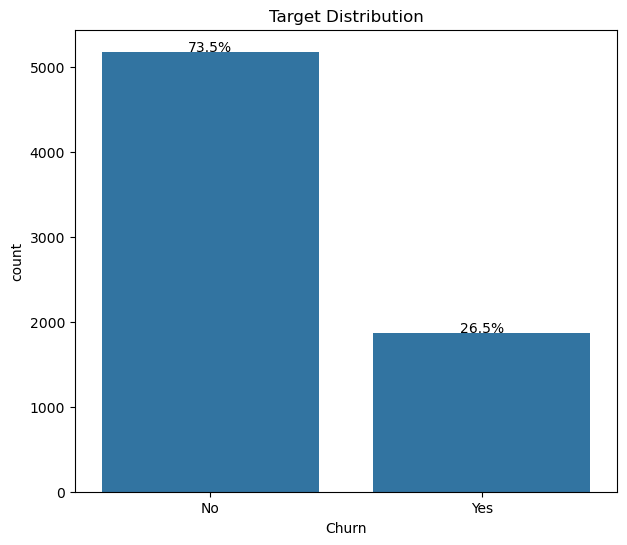

In [17]:
plt.figure(figsize=(7, 6))

ax = sns.countplot(x='Churn', data=df)
write_percent(ax, len(df))
ax.set_title('Target Distribution');

In [18]:
def graph_table(data, x_col, hue_col):
    ax = sns.countplot(data=data, x=x_col, hue=hue_col)
    write_percent(ax, len(df))
    plt.title(f"Target Distribution by {x_col}")
    plt.xlabel(x_col)
    plt.ylabel("Count")
    plt.show()

    grouped = (
        data.groupby(x_col)[hue_col]
        .value_counts(normalize=True)
        .mul(100)
        .rename("ratio")
        .reset_index()
    )

    pivot_table = grouped.pivot(index=x_col, columns=hue_col, values="ratio")
    return pivot_table

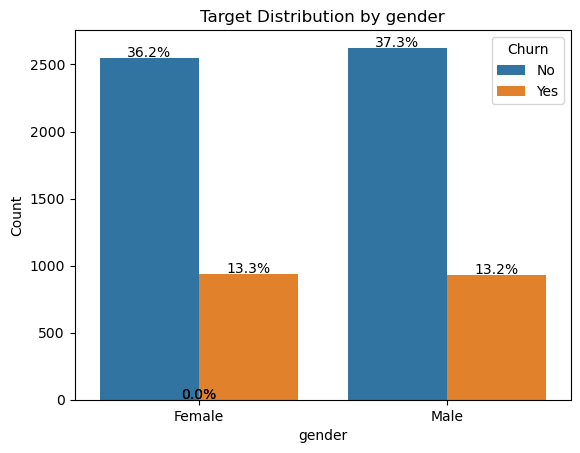

Churn,No,Yes
gender,,
Female,73.079128,26.920872
Male,73.839662,26.160338


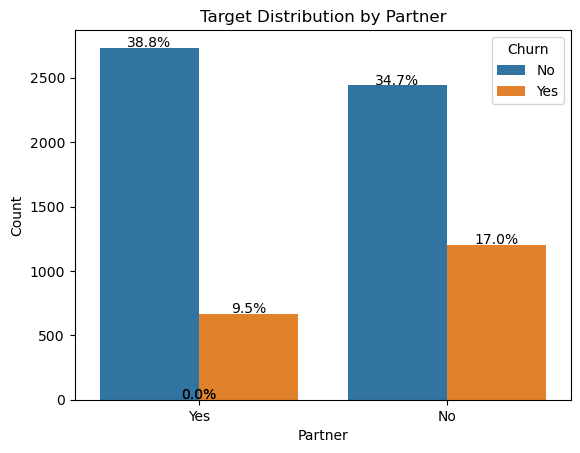

Churn,No,Yes
Partner,,
No,67.042021,32.957979
Yes,80.335097,19.664903


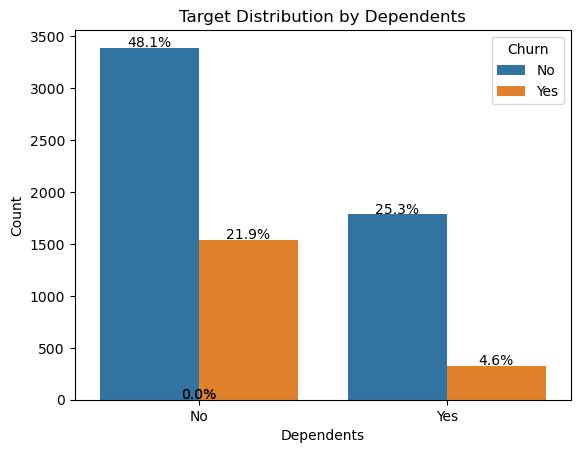

Churn,No,Yes
Dependents,,
No,68.720860,31.279140
Yes,84.549763,15.450237


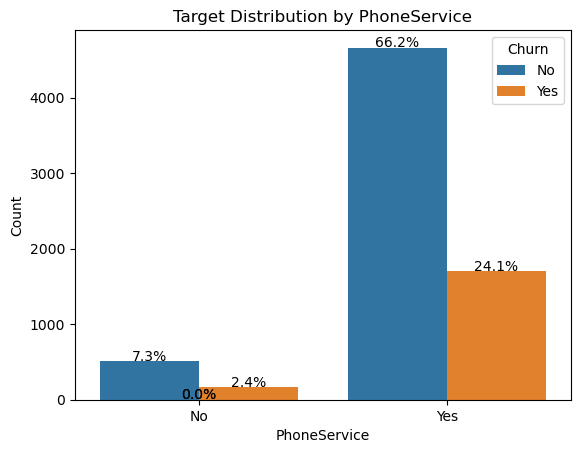

Churn,No,Yes
PhoneService,,
No,75.073314,24.926686
Yes,73.290363,26.709637


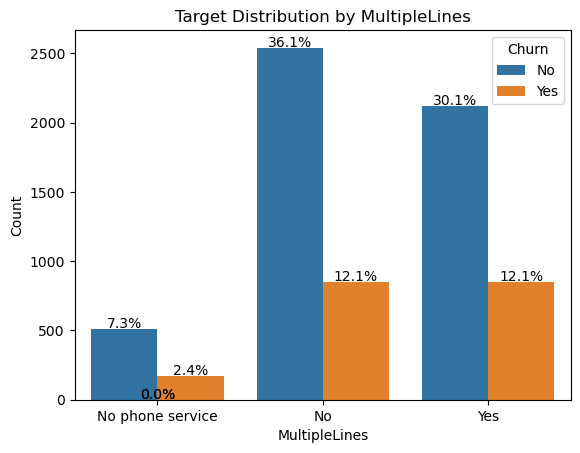

Churn,No,Yes
MultipleLines,,
No,74.955752,25.044248
No phone service,75.073314,24.926686
Yes,71.390104,28.609896


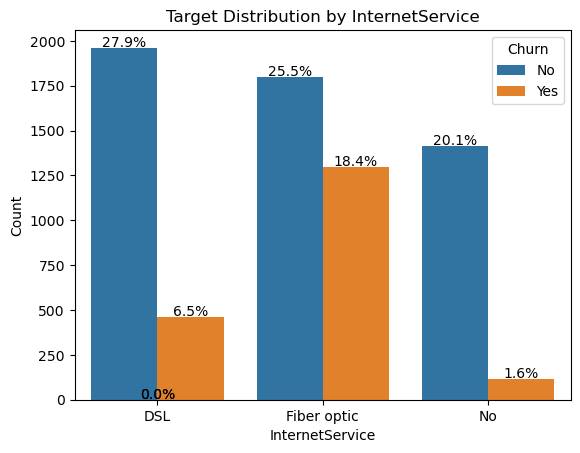

Churn,No,Yes
InternetService,,
DSL,81.040892,18.959108
Fiber optic,58.107235,41.892765
No,92.595020,7.404980


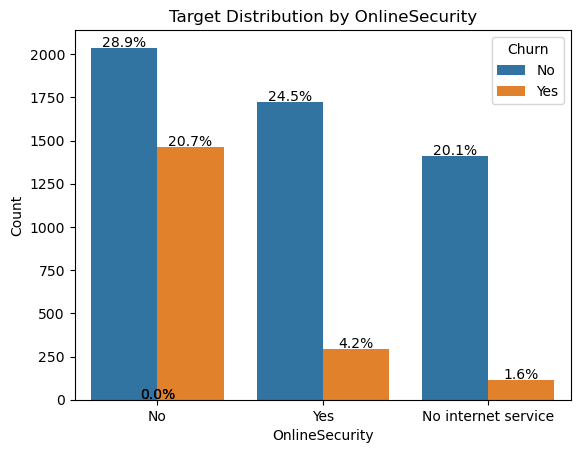

Churn,No,Yes
OnlineSecurity,,
No,58.233276,41.766724
No internet service,92.595020,7.404980
Yes,85.388806,14.611194


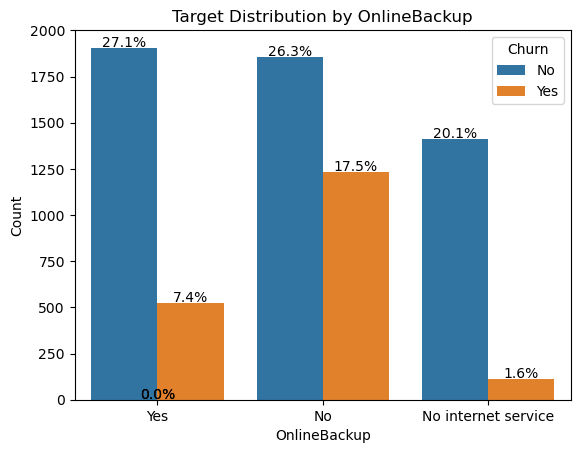

Churn,No,Yes
OnlineBackup,,
No,60.071244,39.928756
No internet service,92.595020,7.404980
Yes,78.468506,21.531494


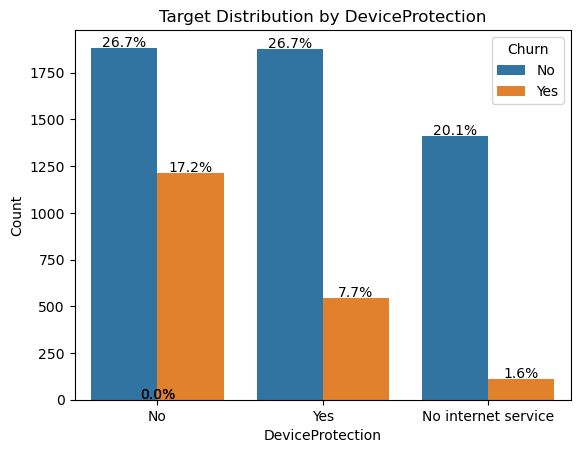

Churn,No,Yes
DeviceProtection,,
No,60.872375,39.127625
No internet service,92.595020,7.404980
Yes,77.497936,22.502064


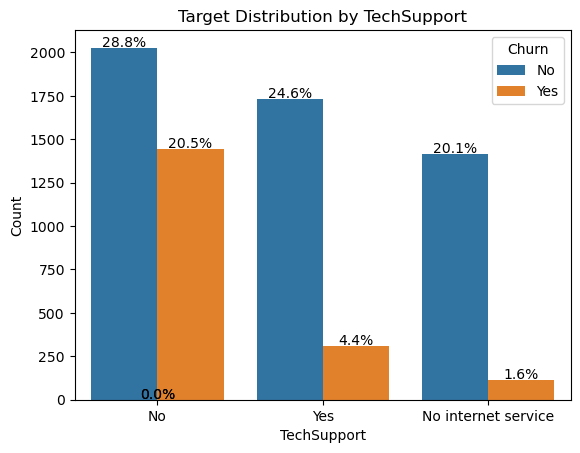

Churn,No,Yes
TechSupport,,
No,58.364526,41.635474
No internet service,92.595020,7.404980
Yes,84.833659,15.166341


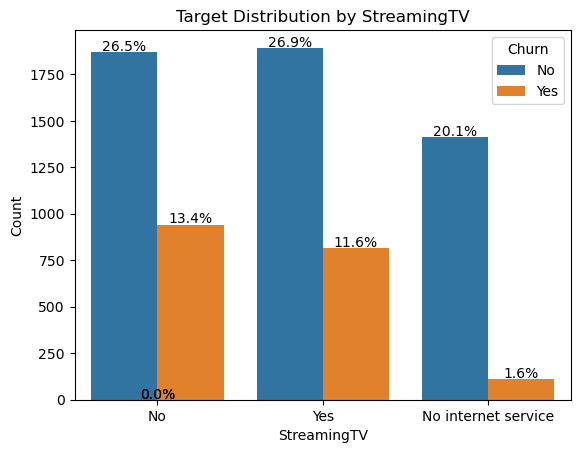

Churn,No,Yes
StreamingTV,,
No,66.476868,33.523132
No internet service,92.595020,7.404980
Yes,69.929812,30.070188


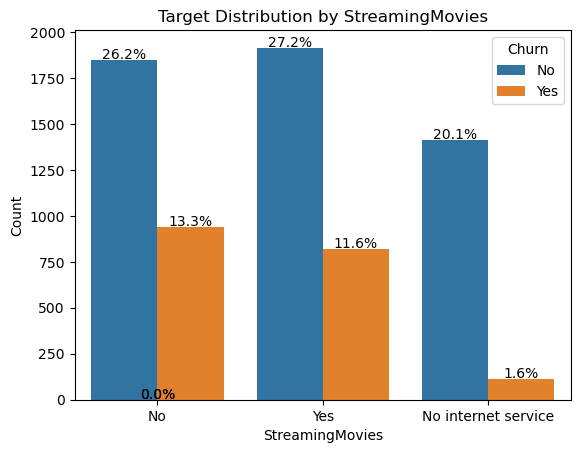

Churn,No,Yes
StreamingMovies,,
No,66.319569,33.680431
No internet service,92.595020,7.404980
Yes,70.058565,29.941435


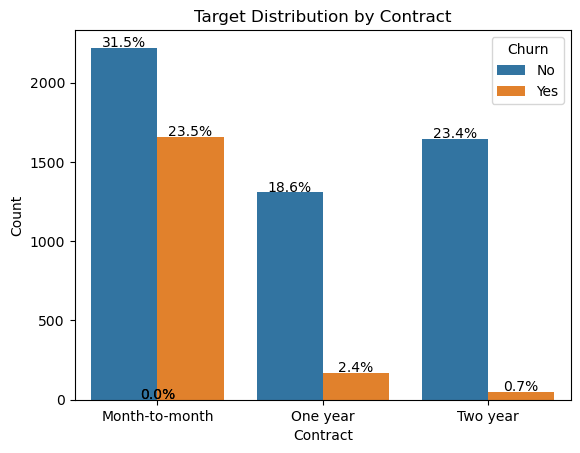

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


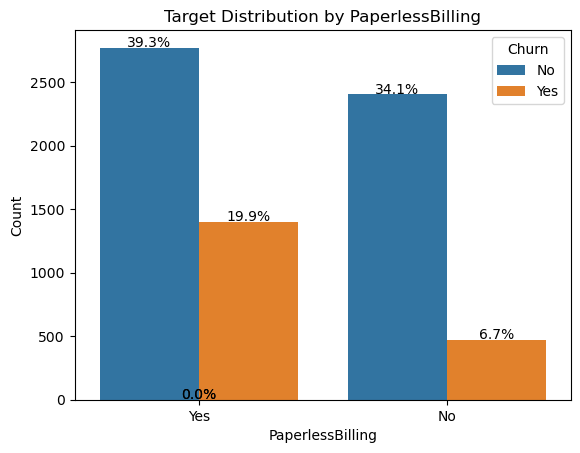

Churn,No,Yes
PaperlessBilling,,
No,83.669916,16.330084
Yes,66.434908,33.565092


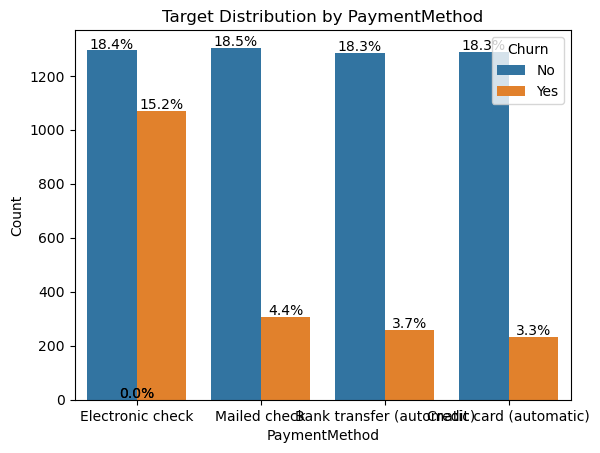

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700


In [19]:
object_columns = df.select_dtypes(include=['object'])
for column in object_columns.columns:
    if column == 'Churn':
        continue
    else:
        graph_table(df, column, 'Churn')

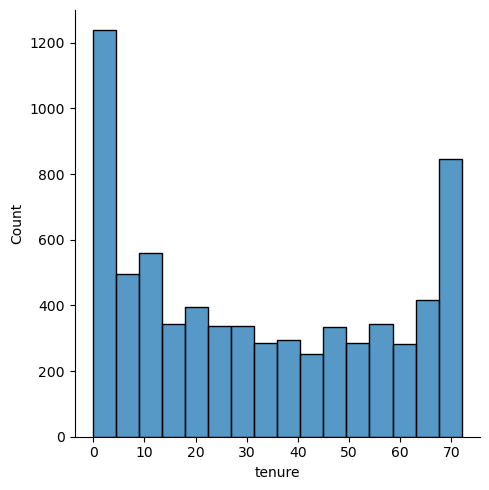

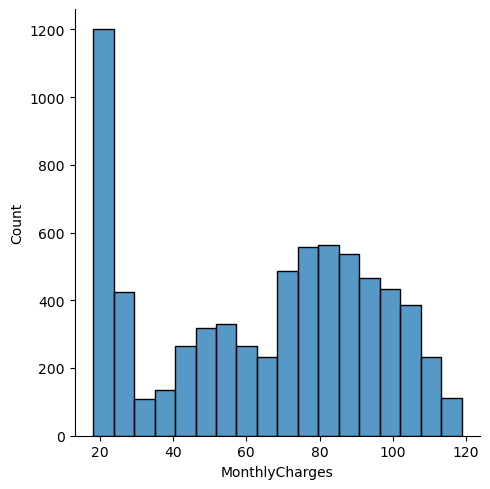

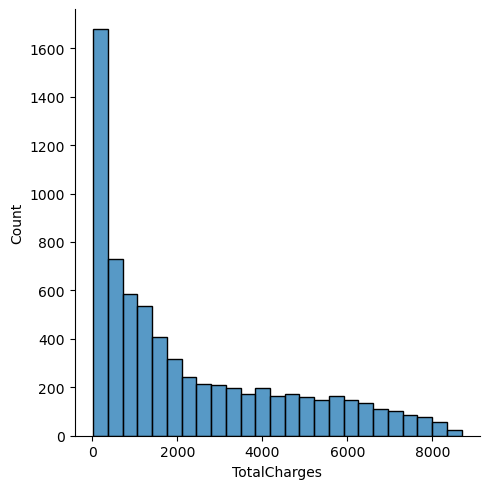

In [20]:
num_columns = ['tenure','MonthlyCharges','TotalCharges']
for column in num_columns:
    sns.displot(data=df, x = column)
    plt.show()

In [21]:
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

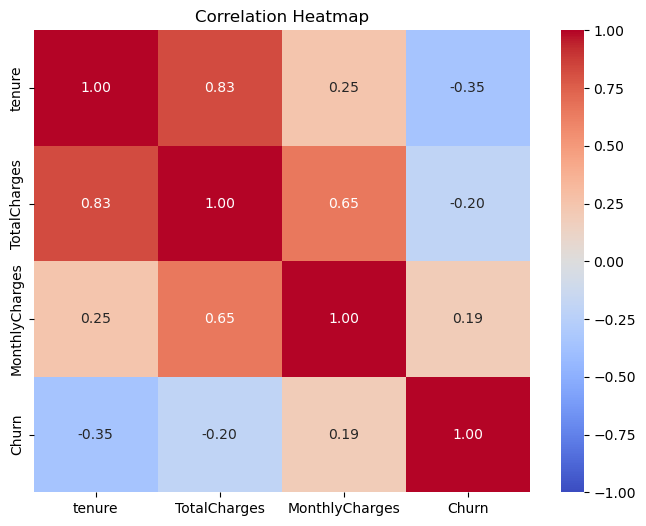

In [22]:
# 상관계수 계산
correlation_matrix = df[['tenure', 'TotalCharges', 'MonthlyCharges', 'Churn']].corr()

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmax = 1, vmin=-1)
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1500x500 with 0 Axes>

<Axes: >

<Axes: xlabel='Churn', ylabel='tenure'>

Text(0.5, 1.0, 'tenure by Churn')

Text(0.5, 0, 'Churn')

Text(0, 0.5, 'tenure')

<Axes: >

<Axes: xlabel='Churn', ylabel='TotalCharges'>

Text(0.5, 1.0, 'TotalCharges by Churn')

Text(0.5, 0, 'Churn')

Text(0, 0.5, 'TotalCharges')

<Axes: >

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

Text(0.5, 1.0, 'MonthlyCharges by Churn')

Text(0.5, 0, 'Churn')

Text(0, 0.5, 'MonthlyCharges')

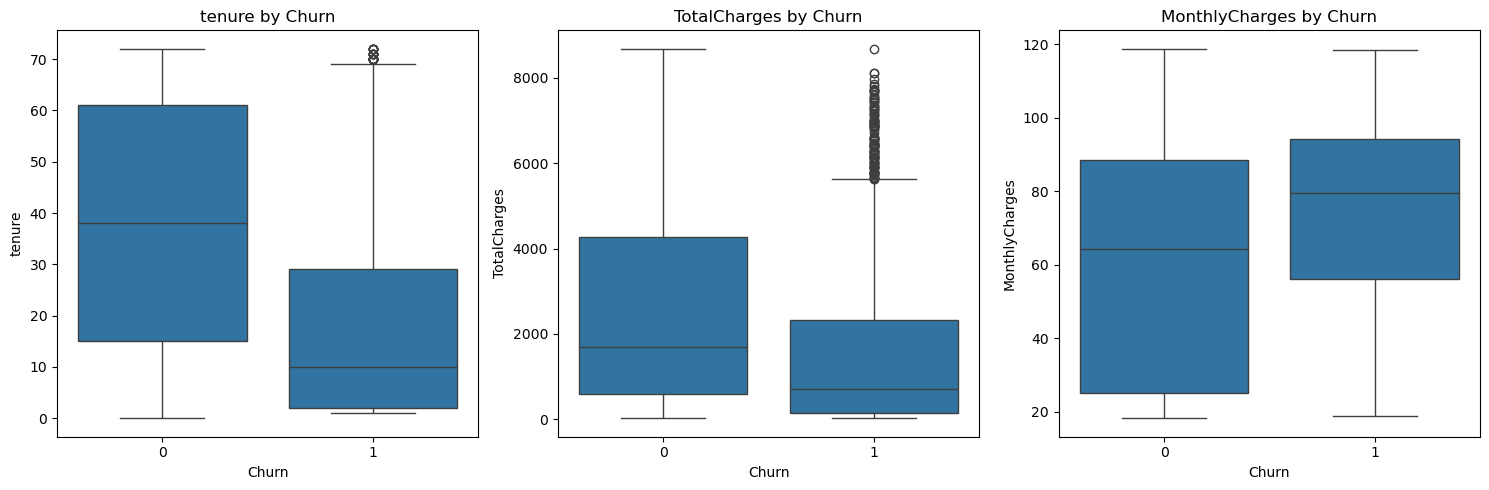

In [23]:
# 각 피처에 대해 박스플롯 생성
plt.figure(figsize=(15, 5))
features = ['tenure', 'TotalCharges', 'MonthlyCharges']

for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'{feature} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

### EDA-이상치

✏️ **이상치(Outlier)**
- 일반적인 패턴에서 벗어난 극단적인 값
- 데이터의 신뢰성을 떨어뜨리거나 분석 결과를 왜곡할 수 있음
- 이상치를 파악하는 방법
  1. 기술 통계:
     - 평균, 중앙값, 표준편차를 확인해 이상치 의심
     - 이상치일 가능성이 높은 값은 평균에서 크게 벗어나거나 표준편차 범위 초과 
  2. 그래프 활용: Boxplot에서 IQR을 사용하여 이상치를 시각적으로 확인
  3. 수리적 기준 (IQR_Interquartile Range)
     $$IQR = Q3-Q1$$
     - 아래쪽 경계: $$Q1-1.5×IQR$$
     - 위쪽 경계: $$Q3+1.5×IQR$$
  4. Z-Score: 데이터의 표준편차 기준으로 이상치 여부 판단
     $$Z= \frac{(X−μ)}{σ}$$
    - 일반적으로 $$|Z|>3$$ 인 값을 이상치로 간주

In [24]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2266.771362,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [25]:
# IQR 방법
num_columns = ['tenure','MonthlyCharges','TotalCharges']

for column in num_columns:
    # IQR 계산
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    
    # 이상치 기준
    lower_bound = Q1-1.5*IQR
    upper_bound = Q1+1.5*IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print('▼',column)
    display(outliers)  # 이상치 데이터 출력

▼ tenure


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


▼ MonthlyCharges


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2115,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,0
2368,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),117.15,8529.50,0
3205,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),117.60,8308.90,0
3299,Male,0,No,No,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),117.20,8035.95,0
3894,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,0
4155,Female,1,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),117.35,8436.25,0
4586,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,0
4610,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,1
4804,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,0
4875,Female,1,Yes,No,48,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,No,Electronic check,117.45,5438.90,1


▼ TotalCharges


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
12,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,0
15,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,0
17,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,0
28,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.25,6369.45,0
30,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,Male,0,No,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,104.95,7544.30,0
7023,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,0
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,1
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0


<Axes: xlabel='TotalCharges'>

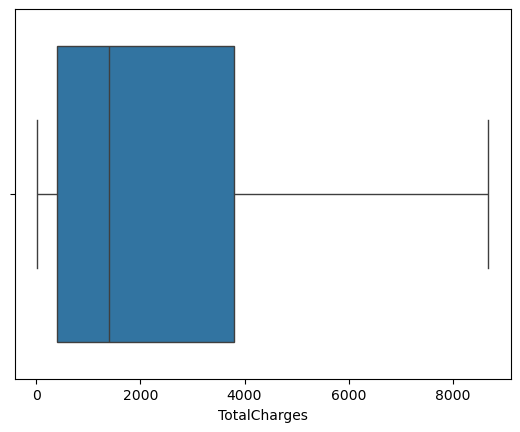

In [26]:
sns.boxplot(data=df, x='TotalCharges')

<Axes: xlabel='MonthlyCharges'>

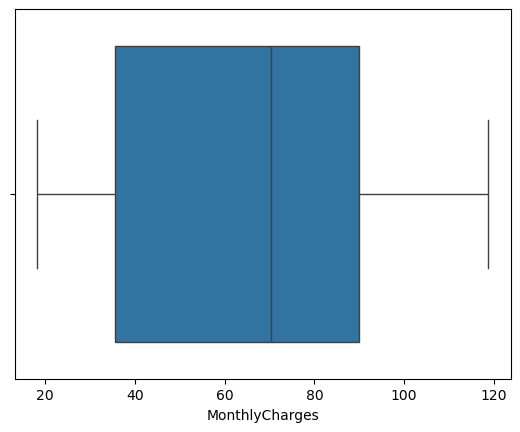

In [27]:
sns.boxplot(data=df, x='MonthlyCharges')

<Axes: xlabel='tenure'>

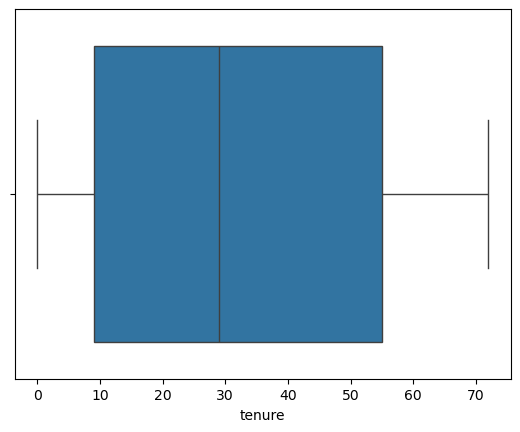

In [28]:
sns.boxplot(data=df, x='tenure')

In [29]:
# 결측치 처리 - 대체
# df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'])

In [30]:
df.isna().sum()
df.shape

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

(7043, 20)

In [31]:
# 결측치 처리 - 제거
df.dropna(subset='TotalCharges',inplace=True)

In [32]:
df.isna().sum()
df.shape

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

(7032, 20)

In [33]:
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})
df['Partner'] = df['Partner'].replace({'No': 0, 'Yes': 1})
df['Dependents'] = df['Dependents'].replace({'No': 0, 'Yes': 1})
df['PhoneService'] = df['PhoneService'].replace({'No': 0, 'Yes': 1})
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'No': 0, 'Yes': 1})

In [34]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [35]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,1,53.85,108.15,1,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,1,70.70,151.65,1,...,True,False,False,True,False,False,False,False,True,False


In [37]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

MinMaxScaler()

In [38]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,1.0,0.0,0.000000,0.0,1.0,0.115423,0.001275,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.464789,1.0,0.0,0.385075,0.215867,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.354229,0.010310,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.619718,0.0,0.0,0.239303,0.210241,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.521891,0.015330,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
y

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [40]:
# test set 10% (우리는 답을 알지만 답을 모른다고 가정)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,
                                                    random_state=42)

In [41]:
# train -> train / valid set 구분
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train,
                                                      random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# 모델 리스트
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42), 
    'CatBoost Classifier': CatBoostClassifier(iterations=100, random_state=42)
}

In [43]:
# 모델 학습 및 평가
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, preds)
    results[model_name] = accuracy
    print(f"{model_name} accuracy is: {accuracy:.4f}")

LogisticRegression(max_iter=1000, random_state=42)

Logistic Regression accuracy is: 0.7909


KNeighborsClassifier()

K-Nearest Neighbors accuracy is: 0.7482


SVC(random_state=42)

Support Vector Classifier accuracy is: 0.7873


DecisionTreeClassifier(random_state=42)

Decision Tree accuracy is: 0.7198


RandomForestClassifier(random_state=42)

Random Forest accuracy is: 0.7832


GradientBoostingClassifier(random_state=42)

Gradient Boosting accuracy is: 0.8033


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

XGBoost accuracy is: 0.7778
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


LGBMClassifier(random_state=42)

LightGBM accuracy is: 0.7903
Learning rate set to 0.152781
0:	learn: 0.5915818	total: 148ms	remaining: 14.7s
1:	learn: 0.5247366	total: 153ms	remaining: 7.51s
2:	learn: 0.4829281	total: 158ms	remaining: 5.11s
3:	learn: 0.4570078	total: 164ms	remaining: 3.94s
4:	learn: 0.4410192	total: 170ms	remaining: 3.22s
5:	learn: 0.4278674	total: 175ms	remaining: 2.73s
6:	learn: 0.4187391	total: 180ms	remaining: 2.39s
7:	learn: 0.4105984	total: 185ms	remaining: 2.12s
8:	learn: 0.4043567	total: 190ms	remaining: 1.92s
9:	learn: 0.3997646	total: 195ms	remaining: 1.76s
10:	learn: 0.3952346	total: 200ms	remaining: 1.61s
11:	learn: 0.3927223	total: 204ms	remaining: 1.5s
12:	learn: 0.3894340	total: 209ms	remaining: 1.4s
13:	learn: 0.3864627	total: 213ms	remaining: 1.31s
14:	learn: 0.3840542	total: 217ms	remaining: 1.23s
15:	learn: 0.3826884	total: 221ms	remaining: 1.16s
16:	learn: 0.3785395	total: 225ms	remaining: 1.1s
17:	learn: 0.3760641	total: 229ms	remaining: 1.04s
18:	learn: 0.3751417	total: 233ms	re

CatBoost Classifier accuracy is: 0.7832


In [44]:
# 결과 출력
print("\nModel Evaluation Summary:")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.4f}")


Model Evaluation Summary:
Logistic Regression: 0.7909
K-Nearest Neighbors: 0.7482
Support Vector Classifier: 0.7873
Decision Tree: 0.7198
Random Forest: 0.7832
Gradient Boosting: 0.8033
XGBoost: 0.7778
LightGBM: 0.7903
CatBoost Classifier: 0.7832


In [45]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Objective function for Optuna
def objective(trial):
    # Define the hyperparameters to optimize
    param = {
        'num_leaves': trial.suggest_int('num_leaves', 31, 60),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 20, 40),
        'random_state': 42
    }

    # Model
    model = LGBMClassifier(**param)
    model.fit(X_train, y_train)

    # Evaluate on validation set
    val_preds = model.predict(X_valid)
    val_accuracy = accuracy_score(y_valid, val_preds)

    return val_accuracy

# 1) optuna 이용 하이퍼파라미터 튜닝
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print("Best parameters found: ", study.best_params)
print("Best validation accuracy: ", study.best_value)

# 2) Train the best model
best_params = study.best_params
best_model = LGBMClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# 3) Valid Set 성능 확인
val_preds = best_model.predict(X_valid)
val_accuracy = accuracy_score(y_valid, val_preds)
print("Final validation accuracy with best model: ", val_accuracy)

[I 2025-01-26 01:48:02,262] A new study created in memory with name: no-name-8b20a45f-2965-40dc-a22d-21fbcbe6fe0d


[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:02,542] Trial 0 finished with value: 0.7796208530805687 and parameters: {'num_leaves': 56, 'learning_rate': 0.06142667128129835, 'n_estimators': 161, 'min_data_in_leaf': 32}. Best is trial 0 with value: 0.7796208530805687.
[I 2025-01-26 01:48:02,743] Trial 1 finished with value: 0.7956161137440758 and parameters: {'num_leaves': 46, 'learning_rate': 0.04625605727477484, 'n_estimators': 113, 'min_data_in_leaf': 25}. Best is trial 1 with value: 0.7956161137440758.


[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:03,091] Trial 2 finished with value: 0.7760663507109005 and parameters: {'num_leaves': 39, 'learning_rate': 0.0817144741732128, 'n_estimators': 259, 'min_data_in_leaf': 37}. Best is trial 1 with value: 0.7956161137440758.


[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:03,355] Trial 3 finished with value: 0.7754739336492891 and parameters: {'num_leaves': 52, 'learning_rate': 0.0862775023669543, 'n_estimators': 169, 'min_data_in_leaf': 20}. Best is trial 1 with value: 0.7956161137440758.


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:03,678] Trial 4 finished with value: 0.7808056872037915 and parameters: {'num_leaves': 55, 'learning_rate': 0.05335632182090441, 'n_estimators': 182, 'min_data_in_leaf': 35}. Best is trial 1 with value: 0.7956161137440758.


[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:03,891] Trial 5 finished with value: 0.8027251184834123 and parameters: {'num_leaves': 37, 'learning_rate': 0.020249669055383036, 'n_estimators': 211, 'min_data_in_leaf': 37}. Best is trial 5 with value: 0.8027251184834123.


[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:04,276] Trial 6 finished with value: 0.7725118483412322 and parameters: {'num_leaves': 59, 'learning_rate': 0.07069575417957423, 'n_estimators': 258, 'min_data_in_leaf': 38}. Best is trial 5 with value: 0.8027251184834123.
[I 2025-01-26 01:48:04,413] Trial 7 finished with value: 0.7968009478672986 and parameters: {'num_leaves': 36, 'learning_rate': 0.06344379287770907, 'n_estimators': 102, 'min_data_in_leaf': 21}. Best is trial 5 with value: 0.8027251184834123.


[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000774 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_sampl

[I 2025-01-26 01:48:04,861] Trial 8 finished with value: 0.7748815165876777 and parameters: {'num_leaves': 58, 'learning_rate': 0.06497466892437778, 'n_estimators': 259, 'min_data_in_leaf': 25}. Best is trial 5 with value: 0.8027251184834123.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:05,214] Trial 9 finished with value: 0.8033175355450237 and parameters: {'num_leaves': 36, 'learning_rate': 0.012921212560027921, 'n_estimators': 299, 'min_data_in_leaf': 26}. Best is trial 9 with value: 0.8033175355450237.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:05,546] Trial 10 finished with value: 0.8039099526066351 and parameters: {'num_leaves': 32, 'learning_rate': 0.01284989922405562, 'n_estimators': 300, 'min_data_in_leaf': 29}. Best is trial 10 with value: 0.8039099526066351.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:05,844] Trial 11 finished with value: 0.8045023696682464 and parameters: {'num_leaves': 31, 'learning_rate': 0.012893993824302816, 'n_estimators': 299, 'min_data_in_leaf': 28}. Best is trial 11 with value: 0.8045023696682464.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:06,132] Trial 12 finished with value: 0.7890995260663507 and parameters: {'num_leaves': 31, 'learning_rate': 0.03400135244778563, 'n_estimators': 300, 'min_data_in_leaf': 30}. Best is trial 11 with value: 0.8045023696682464.


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:06,351] Trial 13 finished with value: 0.8015402843601895 and parameters: {'num_leaves': 31, 'learning_rate': 0.02718538100094898, 'n_estimators': 226, 'min_data_in_leaf': 29}. Best is trial 11 with value: 0.8045023696682464.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:06,717] Trial 14 finished with value: 0.7991706161137441 and parameters: {'num_leaves': 42, 'learning_rate': 0.010188878548743893, 'n_estimators': 277, 'min_data_in_leaf': 32}. Best is trial 11 with value: 0.8045023696682464.


[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000443 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:07,042] Trial 15 finished with value: 0.7825829383886256 and parameters: {'num_leaves': 46, 'learning_rate': 0.038839988410319964, 'n_estimators': 226, 'min_data_in_leaf': 27}. Best is trial 11 with value: 0.8045023696682464.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:07,323] Trial 16 finished with value: 0.7748815165876777 and parameters: {'num_leaves': 33, 'learning_rate': 0.09959298418230411, 'n_estimators': 281, 'min_data_in_leaf': 23}. Best is trial 11 with value: 0.8045023696682464.


[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:07,623] Trial 17 finished with value: 0.79739336492891 and parameters: {'num_leaves': 42, 'learning_rate': 0.02158238219900019, 'n_estimators': 233, 'min_data_in_leaf': 33}. Best is trial 11 with value: 0.8045023696682464.


[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:07,962] Trial 18 finished with value: 0.792654028436019 and parameters: {'num_leaves': 34, 'learning_rate': 0.03366029858350433, 'n_estimators': 277, 'min_data_in_leaf': 29}. Best is trial 11 with value: 0.8045023696682464.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:08,395] Trial 19 finished with value: 0.7843601895734598 and parameters: {'num_leaves': 49, 'learning_rate': 0.04466585672874217, 'n_estimators': 247, 'min_data_in_leaf': 28}. Best is trial 11 with value: 0.8045023696682464.
[I 2025-01-26 01:48:08,585] Trial 20 finished with value: 0.7997630331753555 and parameters: {'num_leaves': 41, 'learning_rate': 0.020229092732827723, 'n_estimators': 137, 'min_data_in_leaf': 31}. Best is trial 11 with value: 0.8045023696682464.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:08,953] Trial 21 finished with value: 0.8033175355450237 and parameters: {'num_leaves': 35, 'learning_rate': 0.010295557115627527, 'n_estimators': 295, 'min_data_in_leaf': 26}. Best is trial 11 with value: 0.8045023696682464.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:09,316] Trial 22 finished with value: 0.8003554502369669 and parameters: {'num_leaves': 38, 'learning_rate': 0.015562413517223886, 'n_estimators': 298, 'min_data_in_leaf': 23}. Best is trial 11 with value: 0.8045023696682464.


[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:09,623] Trial 23 finished with value: 0.7985781990521327 and parameters: {'num_leaves': 31, 'learning_rate': 0.028902921280735436, 'n_estimators': 283, 'min_data_in_leaf': 23}. Best is trial 11 with value: 0.8045023696682464.


[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:09,971] Trial 24 finished with value: 0.7979857819905213 and parameters: {'num_leaves': 33, 'learning_rate': 0.025813318748698626, 'n_estimators': 273, 'min_data_in_leaf': 40}. Best is trial 11 with value: 0.8045023696682464.


[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:10,280] Trial 25 finished with value: 0.7991706161137441 and parameters: {'num_leaves': 40, 'learning_rate': 0.014885818326137957, 'n_estimators': 242, 'min_data_in_leaf': 28}. Best is trial 11 with value: 0.8045023696682464.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:10,558] Trial 26 finished with value: 0.8021327014218009 and parameters: {'num_leaves': 35, 'learning_rate': 0.01611544448227276, 'n_estimators': 263, 'min_data_in_leaf': 26}. Best is trial 11 with value: 0.8045023696682464.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:10,854] Trial 27 finished with value: 0.7879146919431279 and parameters: {'num_leaves': 44, 'learning_rate': 0.04001634221575181, 'n_estimators': 206, 'min_data_in_leaf': 30}. Best is trial 11 with value: 0.8045023696682464.


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:11,174] Trial 28 finished with value: 0.79739336492891 and parameters: {'num_leaves': 33, 'learning_rate': 0.030248096193346518, 'n_estimators': 289, 'min_data_in_leaf': 24}. Best is trial 11 with value: 0.8045023696682464.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000468 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:11,404] Trial 29 finished with value: 0.7879146919431279 and parameters: {'num_leaves': 37, 'learning_rate': 0.053193902739668814, 'n_estimators': 188, 'min_data_in_leaf': 34}. Best is trial 11 with value: 0.8045023696682464.
[I 2025-01-26 01:48:11,584] Trial 30 finished with value: 0.8050947867298578 and parameters: {'num_leaves': 31, 'learning_rate': 0.022935873191826467, 'n_estimators': 152, 'min_data_in_leaf': 27}. Best is trial 30 with value: 0.8050947867298578.


[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_sampl

[I 2025-01-26 01:48:11,778] Trial 31 finished with value: 0.8033175355450237 and parameters: {'num_leaves': 31, 'learning_rate': 0.022897886465753903, 'n_estimators': 144, 'min_data_in_leaf': 27}. Best is trial 30 with value: 0.8050947867298578.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_sampl

[I 2025-01-26 01:48:12,010] Trial 32 finished with value: 0.8015402843601895 and parameters: {'num_leaves': 33, 'learning_rate': 0.010319440095099244, 'n_estimators': 157, 'min_data_in_leaf': 28}. Best is trial 30 with value: 0.8050947867298578.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:12,218] Trial 33 finished with value: 0.7979857819905213 and parameters: {'num_leaves': 35, 'learning_rate': 0.016219803980021857, 'n_estimators': 126, 'min_data_in_leaf': 31}. Best is trial 30 with value: 0.8050947867298578.


[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:12,488] Trial 34 finished with value: 0.8050947867298578 and parameters: {'num_leaves': 39, 'learning_rate': 0.018014539220372067, 'n_estimators': 164, 'min_data_in_leaf': 25}. Best is trial 30 with value: 0.8050947867298578.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:12,703] Trial 35 finished with value: 0.8056872037914692 and parameters: {'num_leaves': 39, 'learning_rate': 0.019850726778387996, 'n_estimators': 162, 'min_data_in_leaf': 25}. Best is trial 35 with value: 0.8056872037914692.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:12,915] Trial 36 finished with value: 0.7962085308056872 and parameters: {'num_leaves': 39, 'learning_rate': 0.034327628034288925, 'n_estimators': 164, 'min_data_in_leaf': 21}. Best is trial 35 with value: 0.8056872037914692.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000453 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:13,172] Trial 37 finished with value: 0.8021327014218009 and parameters: {'num_leaves': 49, 'learning_rate': 0.02091390673738574, 'n_estimators': 173, 'min_data_in_leaf': 24}. Best is trial 35 with value: 0.8056872037914692.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000469 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:13,392] Trial 38 finished with value: 0.7902843601895735 and parameters: {'num_leaves': 49, 'learning_rate': 0.04343287736203965, 'n_estimators': 154, 'min_data_in_leaf': 25}. Best is trial 35 with value: 0.8056872037914692.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000484 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:13,642] Trial 39 finished with value: 0.7819905213270142 and parameters: {'num_leaves': 43, 'learning_rate': 0.0798729996343581, 'n_estimators': 190, 'min_data_in_leaf': 22}. Best is trial 35 with value: 0.8056872037914692.


[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:13,870] Trial 40 finished with value: 0.7873222748815166 and parameters: {'num_leaves': 53, 'learning_rate': 0.057947170193406505, 'n_estimators': 144, 'min_data_in_leaf': 27}. Best is trial 35 with value: 0.8056872037914692.
[I 2025-01-26 01:48:14,048] Trial 41 finished with value: 0.8045023696682464 and parameters: {'num_leaves': 39, 'learning_rate': 0.024610975401971318, 'n_estimators': 122, 'min_data_in_leaf': 25}. Best is trial 35 with value: 0.8056872037914692.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000486 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_sampl

[I 2025-01-26 01:48:14,223] Trial 42 finished with value: 0.8074644549763034 and parameters: {'num_leaves': 38, 'learning_rate': 0.024573197264640412, 'n_estimators': 119, 'min_data_in_leaf': 24}. Best is trial 42 with value: 0.8074644549763034.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000474 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_sampl

[I 2025-01-26 01:48:14,382] Trial 43 finished with value: 0.8015402843601895 and parameters: {'num_leaves': 37, 'learning_rate': 0.019038477886453162, 'n_estimators': 107, 'min_data_in_leaf': 24}. Best is trial 42 with value: 0.8074644549763034.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:14,602] Trial 44 finished with value: 0.7950236966824644 and parameters: {'num_leaves': 39, 'learning_rate': 0.031619664527137895, 'n_estimators': 176, 'min_data_in_leaf': 20}. Best is trial 42 with value: 0.8074644549763034.
[I 2025-01-26 01:48:14,794] Trial 45 finished with value: 0.7956161137440758 and parameters: {'num_leaves': 47, 'learning_rate': 0.04897979963829749, 'n_estimators': 118, 'min_data_in_leaf': 25}. Best is trial 42 with value: 0.8074644549763034.


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_sampl

[I 2025-01-26 01:48:14,978] Trial 46 finished with value: 0.7968009478672986 and parameters: {'num_leaves': 36, 'learning_rate': 0.03815149670639553, 'n_estimators': 131, 'min_data_in_leaf': 26}. Best is trial 42 with value: 0.8074644549763034.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_sampl

[I 2025-01-26 01:48:15,210] Trial 47 finished with value: 0.8009478672985783 and parameters: {'num_leaves': 45, 'learning_rate': 0.025504845017138775, 'n_estimators': 148, 'min_data_in_leaf': 22}. Best is trial 42 with value: 0.8074644549763034.


[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:15,436] Trial 48 finished with value: 0.8033175355450237 and parameters: {'num_leaves': 40, 'learning_rate': 0.018026926776980985, 'n_estimators': 163, 'min_data_in_leaf': 27}. Best is trial 42 with value: 0.8074644549763034.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000478 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629


[I 2025-01-26 01:48:15,689] Trial 49 finished with value: 0.8015402843601895 and parameters: {'num_leaves': 34, 'learning_rate': 0.028237271103997326, 'n_estimators': 199, 'min_data_in_leaf': 24}. Best is trial 42 with value: 0.8074644549763034.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
Best parameters found:  {'num_leaves': 38, 'learning_rate': 0.024573197264640412, 'n_estimators': 119, 'min_data_in_leaf': 24}
Best validation accuracy:  0.8074644549763034
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train 

LGBMClassifier(learning_rate=0.024573197264640412, min_data_in_leaf=24,
               n_estimators=119, num_leaves=38, random_state=42)

[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
Final validation accuracy with best model:  0.8074644549763034


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# 모델과 파라미터 설정
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0]
}

# GridSearchCV 실행
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# 데이터에 적합
grid_search.fit(X_train, y_train)

# 결과 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


# 최적 파라미터로 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_valid)

# Accuracy Score 출력
accuracy = accuracy_score(y_valid, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy Score:", accuracy)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import uniform

# 모델과 파라미터 범위 설정
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_dist = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': uniform(0.01, 0.2),  # 0.01 ~ 0.21 범위에서 랜덤 샘플링
    'n_estimators': [50, 100, 200, 300],
    'subsample': uniform(0.6, 0.4),       # 0.6 ~ 1.0 범위에서 랜덤 샘플링
}

# RandomizedSearchCV 실행
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    scoring='roc_auc',
    cv=3,
    n_iter=20,  # 랜덤 탐색 횟수
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# 결과 출력
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


# 최적 파라미터로 예측
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_valid)

# Accuracy Score 출력
accuracy = accuracy_score(y_valid, y_pred)
print("Best Parameters:", random_search.best_params_)
print("Accuracy Score:", accuracy)

In [ ]:
from bayes_opt import BayesianOptimization
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# 평가 함수 정의
def xgb_evaluate(max_depth, learning_rate, n_estimators, subsample):
    model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        max_depth=int(max_depth),
        learning_rate=learning_rate,
        n_estimators=int(n_estimators),
        subsample=subsample,
        random_state=42
    )
    # Cross-validation 평균 AUC 계산
    cv_score = cross_val_score(model, X_train, y_train, cv=3, scoring='roc_auc')
    return np.mean(cv_score)

# 파라미터 범위 설정
param_bounds = {
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.3),
    'n_estimators': (50, 300),
    'subsample': (0.6, 1.0)
}

# Bayesian Optimization 실행
optimizer = BayesianOptimization(
    f=xgb_evaluate,
    pbounds=param_bounds,
    random_state=42,
    verbose=2
)

optimizer.maximize(init_points=5, n_iter=25)

# 최적 파라미터 출력
print("Best Parameters:", optimizer.max)

# 최적 파라미터로 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_valid)

# Accuracy Score 출력
accuracy = accuracy_score(y_valid, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy Score:", accuracy)